## Лаб.01

### Знакомство с Keras. Работа в Colab

---

#### Задание:
Познакомиться с практическим применением ИНС на примере простейшей задачи компьютерного зрения: распознавания предметов одежды. Исходные данные – в наборе Fashion-MNIST. Описание набора [здесь](https://www.tensorflow.org/datasets/catalog/fashion_mnist).

Этот набор данных создан компанией Zalando, которая занимается продажей одежды, обуви и других товаров. Набор данных содержит изображения одежды и обуви с сайта Zalando. Всего в наборе данных 60 тысяч обучающих и 10 тысяч тестовых примеров. Каждый пример относится к одному из 10 классов изображений: футболка, брюки, свитер, платье, пальто, туфли, рубашка, кроссовки, сумка, ботинки (метки классов – цифры 0, 1, … , 9; [таблица соответствий английским названиям](https://keras.io/api/datasets/fashion_mnist/)).

Изображения в оттенках серого: каждый пиксель описывается значением интенсивности в диапазоне от 0 (черный) до 255 (белый); размер каждого изображения – 28 на 28 пикселей.

Изображения не хранятся в виде отдельных графических файлов, а для упрощения работы записаны в один большой бинарный файл.

Задача распознавания заключается в отнесении входного изображения (в указанном формате) к одному из 10 классов.

В ходе выполнения задания необходимо создать модель полносвязной ИНС для решения поставленной задачи.

**Порядок выполнения работы:**
1.	Импортируйте набор данных Fashion-MNIST:<br>`from tensorflow.keras.datasets import fashion_mnist`
2.	Создайте обучающую и тестовую выборки (тензоры, содержащие входные признаки и метки) с помощью метода `load_data()`: https://keras.io/api/datasets/fashion_mnist/ 
3.	Для удобства создайте текстовые метки классов (на русском или английском языке):<br>`classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']`
4.	Выведите любые 50 изображений из обучающей выборки вместе с соответствующими метками классов:<br><br>`import matplotlib.pyplot as plt`<br>`%matplotlib inline`<br>`plt.figure(figsize=(10,10))`<br>`n = 100`<br>`for i in range(n, n+50):`<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`    plt.subplot(5, 10, i-n+1)`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`    plt.xticks([])`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`    plt.yticks([])`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`    plt.grid(False)`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`    plt.imshow(x_train[i], cmap=plt.cm.binary)`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`    plt.xlabel(classes[y_train[i]])`<br><br>Экспериментируя со значением n, получите разные фрагменты набора.<br><br>

5.	Выведите размерность массива x_train, содержащего входные признаки обучающего набора. Преобразуйте его в двумерный массив размерности (60000, 784).
6.	Выполните масштабирование входных данных:<br>`x_train = x_train / 255`
7.	Выведите метку любого объекта из y_train (должна быть цифра 0т 0 до 9).
8.	Выполните бинарное кодирование меток классов:<br>`from tensorflow.keras import utils`<br>`y_train = utils.to_categorical(y_train, 10)`<br>Еще раз выведите метку того же объекта, что в п. 7, и проверьте результат бинарного кодирования.
9.	Создайте полносвязную ИНС с одним скрытым слоем с 800 нейронами для решения задачи классификации. Скомпилируйте модель и выведите информацию о полученной архитектуре и количестве параметров модели. Проконтролируйте правильность архитектуры.
10.	Обучите созданную ИНС, задав размер батча, равным 200, и количество эпох 50. Выведите и проанализируйте результаты процесса обучения по эпохам.
11.	Поэкспериментируйте с размером батчей, проследите, как это влияет на скорость и результаты обучения.
12.	Получите предсказания обученной модели для нескольких объектов тестовой выборки. Выведите как вероятности принадлежности классам, так и метку прогнозируемого (имеющего наибольшую вероятность) класса (для этого можно использовать функцию numpy.argmax). Выведите также изображения этих объектов и правильные ответы.
13.	Выполните проверку качества обученной модели на тестовых данных. <br><u>Внимание</u>: с тестовыми данными (разумеется) необходимо выполнить те же предварительные преобразования, что и с обучающими (изменение размерности, масштабирование и бинарное кодирование).
14.	Сделайте вывод о возможном переобучении модели (да/нет – с обоснованием, почему).

---

1.	Импортируйте набор данных Fashion-MNIST:<br>`from tensorflow.keras.datasets import fashion_mnist`

In [1]:
# импортируем набор данных Fashion-MNIST

from tensorflow.keras import layers, Sequential
from tensorflow.keras.datasets import fashion_mnist

---

2.	Создайте обучающую и тестовую выборки (тензоры, содержащие входные признаки и метки) с помощью метода `load_data()`: https://keras.io/api/datasets/fashion_mnist/ 

In [2]:
# создаем обучающую и тестовую выборки

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


---

3.	Для удобства создайте текстовые метки классов (на русском или английском языке):<br>`classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']`

In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

---

4.	Выведите любые 50 изображений из обучающей выборки вместе с соответствующими метками классов.

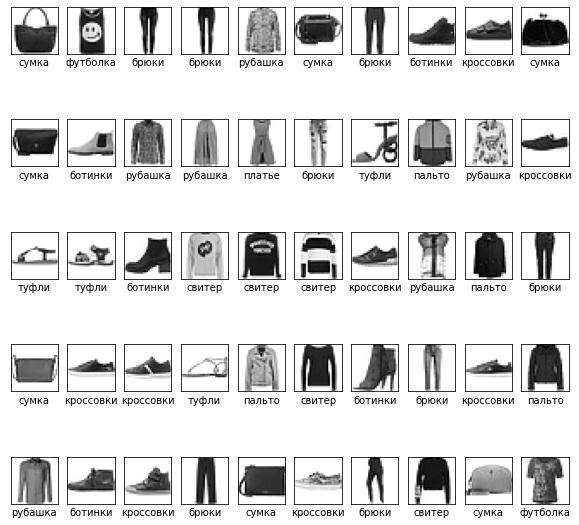

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
n = 100

for i in range(n, n+50):
    plt.subplot(5, 10, i-n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

---

5.	Выведите размерность массива x_train, содержащего входные признаки обучающего набора. Преобразуйте его в двумерный массив размерности (60000, 784).

In [5]:
x_train = x_train.reshape(60000, 784)
print(x_train.shape)

(60000, 784)


---

6.	Выполните масштабирование входных данных:<br>`x_train = x_train / 255`

In [6]:
x_train = x_train / 255

---

7.	Выведите метку любого объекта из y_train (должна быть цифра 0т 0 до 9).

In [7]:
print(y_train[0])

9


---

8.	Выполните бинарное кодирование меток классов:<br>`from tensorflow.keras import utils`<br>`y_train = utils.to_categorical(y_train, 10)`<br>Еще раз выведите метку того же объекта, что в п. 7, и проверьте результат бинарного кодирования.

In [8]:
from tensorflow.keras import utils

y_train = utils.to_categorical(y_train, 10)
print(y_train.shape)

(60000, 10)


In [9]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


---

9.	Создайте полносвязную ИНС с одним скрытым слоем с 800 нейронами для решения задачи классификации. Скомпилируйте модель и выведите информацию о полученной архитектуре и количестве параметров модели. Проконтролируйте правильность архитектуры.

In [10]:
model = Sequential()
model.add(layers.Dense(800, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


---

10.	Обучите созданную ИНС, задав размер батча, равным 200, и количество эпох 50. Выведите и проанализируйте результаты процесса обучения по эпохам.

In [11]:
history = model.fit(x_train, y_train, batch_size=200, epochs=50)

Epoch 1/50
300/300 [==============================] - 6s 5ms/step - loss: 0.5124 - accuracy: 0.8217
Epoch 2/50
300/300 [==============================] - 1s 3ms/step - loss: 0.3729 - accuracy: 0.8667
Epoch 3/50
300/300 [==============================] - 1s 3ms/step - loss: 0.3327 - accuracy: 0.8798
Epoch 4/50
300/300 [==============================] - 1s 3ms/step - loss: 0.3095 - accuracy: 0.8882
Epoch 5/50
300/300 [==============================] - 1s 3ms/step - loss: 0.2871 - accuracy: 0.8953
Epoch 6/50
300/300 [==============================] - 1s 3ms/step - loss: 0.2737 - accuracy: 0.9005
Epoch 7/50
300/300 [==============================] - 1s 3ms/step - loss: 0.2610 - accuracy: 0.9032
Epoch 8/50
300/300 [==============================] - 1s 3ms/step - loss: 0.2465 - accuracy: 0.9087
Epoch 9/50
300/300 [==============================] - 1s 3ms/step - loss: 0.2368 - accuracy: 0.9136
Epoch 10/50
300/300 [==============================] - 1s 3ms/step - loss: 0.2291 - accuracy: 0.9161

---

11.	Поэкспериментируйте с размером батчей, проследите, как это влияет на скорость и результаты обучения.

In [12]:
history_1 = model.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1345 - accuracy: 0.9505
Epoch 2/50
600/600 [==============================] - 2s 4ms/step - loss: 0.0987 - accuracy: 0.9636
Epoch 3/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0848 - accuracy: 0.9683
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0802 - accuracy: 0.9694
Epoch 5/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0825 - accuracy: 0.9691
Epoch 6/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0789 - accuracy: 0.9707
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0767 - accuracy: 0.9712
Epoch 8/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0747 - accuracy: 0.9736
Epoch 9/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0748 - accuracy: 0.9723
Epoch 10/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0719 - accuracy: 0.9730

---

12.	Получите предсказания обученной модели для нескольких объектов тестовой выборки. Выведите как вероятности принадлежности классам, так и метку прогнозируемого (имеющего наибольшую вероятность) класса (для этого можно использовать функцию numpy.argmax). Выведите также изображения этих объектов и правильные ответы.

313/313 [==============================] - 1s 1ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9
9


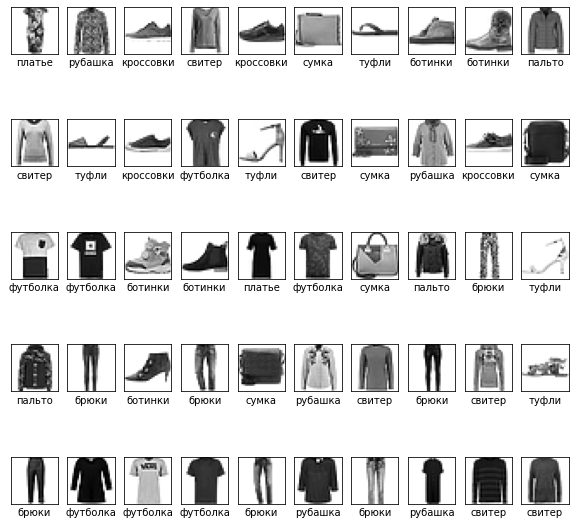

In [13]:
import numpy as np

x_test = x_test.reshape(10000, 784)
predictions = model.predict(x_test)

print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[0])

plt.figure(figsize=(10, 10))
n = 100

for i in range(n, n + 50):
    plt.subplot(5, 10, i - n + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(classes[y_test[i]])
plt.show()

---

13.	Выполните проверку качества обученной модели на тестовых данных. <br><u>Внимание</u>: с тестовыми данными (разумеется) необходимо выполнить те же предварительные преобразования, что и с обучающими (изменение размерности, масштабирование и бинарное кодирование).

In [14]:
x_test = x_test.reshape(10000, 784)
x_test = x_test / 255
print(y_test[0])

y_test = utils.to_categorical(y_test[:10000], 10)

9


In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.6579 - accuracy: 0.8969
Test accuracy: 0.8968999981880188


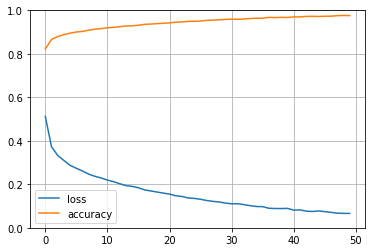

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(6,4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()